# Simulate the striatum example network

This example continues ```striatum_example.ipynb``` and shows how to setup input and run the simulation.

### Simulation duration and number of cores

You can change the duration of the simulation, and the number of cores. If you run on EBRAINS the memory available is severly limited, and the number of cores need to be reduced to 3 which increases runtime.

In [1]:
duration = 3.5
n_cores = 6

%matplotlib inline

## Setup the input

Here we use the file ```input_config/striatum-test-input.json```.

The input can be generated in serial or in parallel. To generate it in parallel, pass ```rc``` parameter as in the previous examples.


In [2]:
import os
from snudda import Snudda
network_path = os.path.join("networks", "striatum_example")

In [3]:
snd = Snudda(network_path=network_path)
snd.setup_input(input_config=os.path.join("input_config","striatum-test-input.json"))

Setting up inputs, assuming input.json exists
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from networks/striatum_example/network-config.json
Writing input spikes to networks/striatum_example/input-spikes.hdf5
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from networks/striatum_example/network-config.json
Writing spikes to networks/striatum_example/input-spikes.hdf5
stop_parallel disabled, to keep pool running.

Execution time: 2.0s


## Plot synaptic input

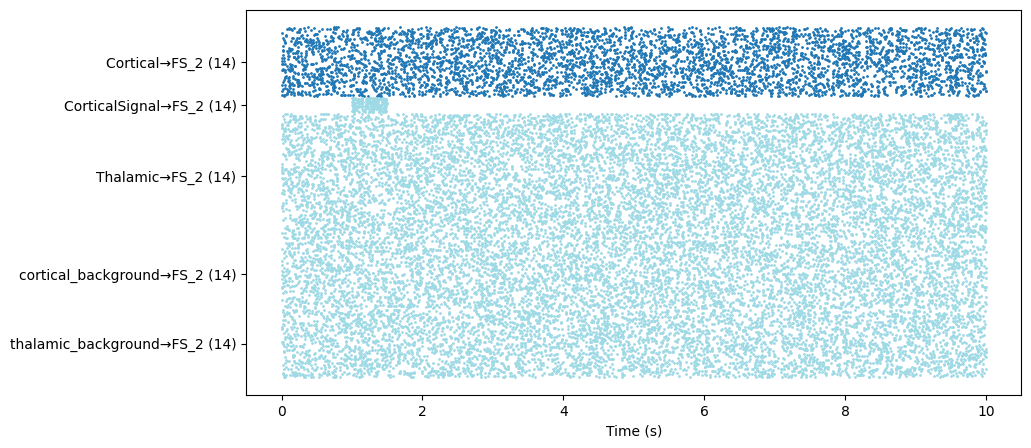

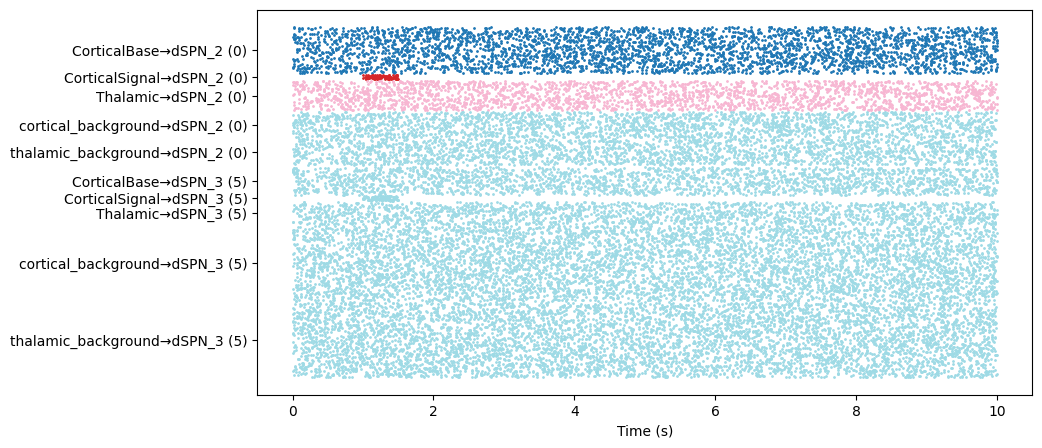

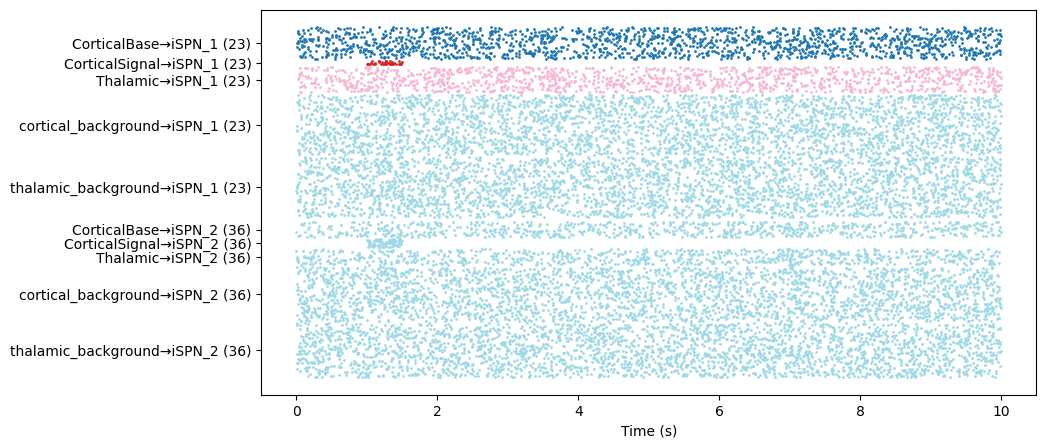

In [4]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_path=network_path)
spi.plot_input(neuron_type="FS", num_neurons=3)
spi.plot_input(neuron_type="dSPN", num_neurons=2)
spi.plot_input(neuron_type="iSPN", num_neurons=2)

## Run the neuron simulation

Here we run the network for 3.5 seconds. 

__If the os.system does not run the command, please run it manually in your terminal.__

In [5]:
cmd_str = f"mpiexec -n {n_cores} snudda simulate {network_path} --time {duration}"
print(cmd_str)
os.system(cmd_str)

#

mpiexec -n 6 snudda simulate networks/striatum_example --time 3.5


256

In [6]:
from subprocess import run
run(cmd_str, shell=True, check=True)

CalledProcessError: Command 'mpiexec -n 6 snudda simulate networks/striatum_example --time 3.5' returned non-zero exit status 1.

## Plotting

In [7]:
from snudda.utils import SnuddaLoad
from snudda.utils import SnuddaLoadSimulation

sl = SnuddaLoad(network_path)

sim_file = os.path.join(network_path, "simulation", "output.hdf5")
network_file = os.path.join(network_path, "network-synapses.hdf5")

sls = SnuddaLoadSimulation(network_simulation_output_file=sim_file)

Loading networks/striatum_example/simulation/output.hdf5


### Plot voltage traces

Loading network info from networks/striatum_example/network-synapses.hdf5
Loading input info from networks/striatum_example/input-spikes.hdf5
Loading networks/striatum_example/simulation/output.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Plotted 50 traces (total 50)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/striatum_example/figures/Network-voltage-trace--iSPN-ChIN-dSPN-FS.pdf


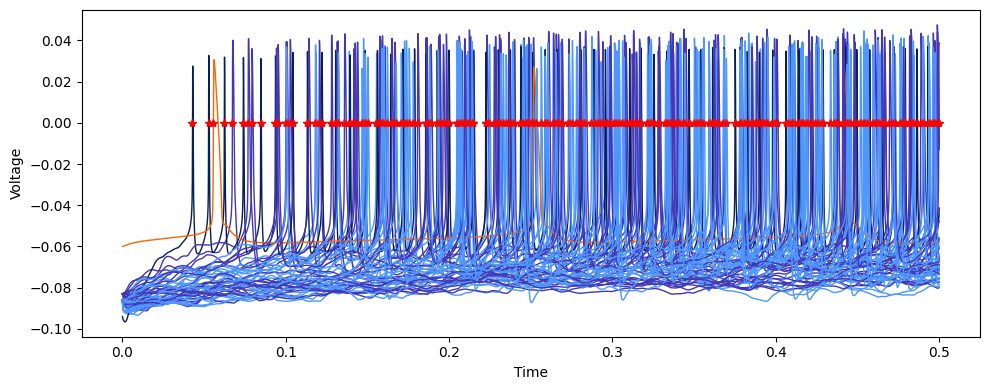

In [8]:
from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file=sim_file, network_file=network_file)
# Use trace_id to specify which traces
ax = pt.plot_traces(offset=0, time_range=(0,0.5),fig_size=(10,4))

### Spike raster plot

Saving figure to networks/striatum_example/figures/spike-raster.png


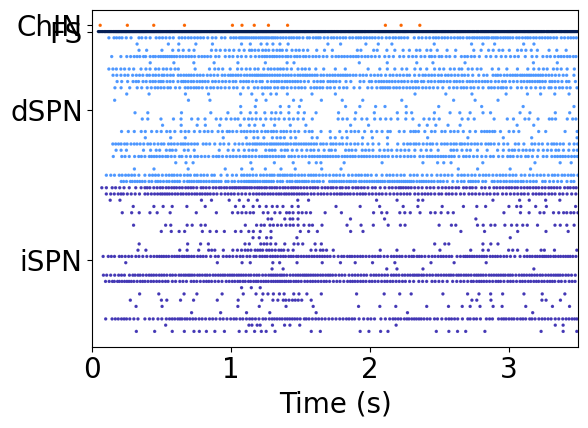

In [9]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path,
                             network_file=network_file,
                             simulation_file=sim_file,
                             snudda_load=sl, snudda_simulation_load=sls)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

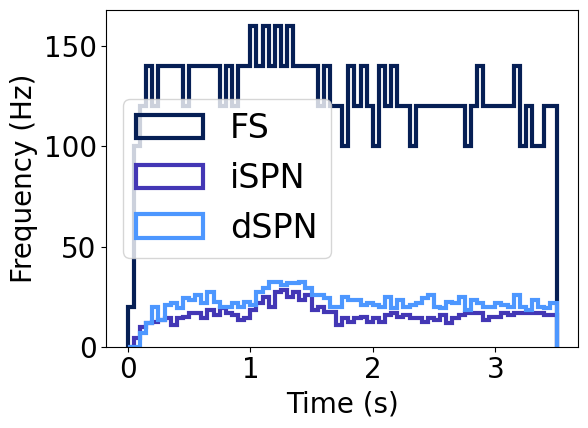

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [10]:
spr.plot_spike_histogram_type(neuron_type=["dSPN", "iSPN", "FS"])